In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
numTeste = "7"
#tipoTeste = "sw"
tipoTeste = "parimpar"
df = pd.read_table("../Saidas/Teste"+numTeste+"/info_"+tipoTeste+".txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
#df.reset_index().set_index('index', drop=False)
#df.drop(df[df.Tempo < 110].index, inplace=True)
#df.drop(df[df.Tempo > 260].index, inplace=True)
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,RegrasBloqueadas,BytesEnviados,Medicao
0,8,HW,4,4,0,107352,1
1,8,SW,7,7,0,240591,1
2,12,HW,9,9,0,2348136,2
3,12,SW,15,15,0,2844438,2
4,16,HW,16,16,0,9256464,3
5,16,SW,23,23,0,11679237,3
6,20,HW,24,24,0,24613848,4
7,20,SW,30,30,0,29932284,4
8,24,HW,32,32,0,52117128,5
9,24,SW,34,37,0,61490748,5


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

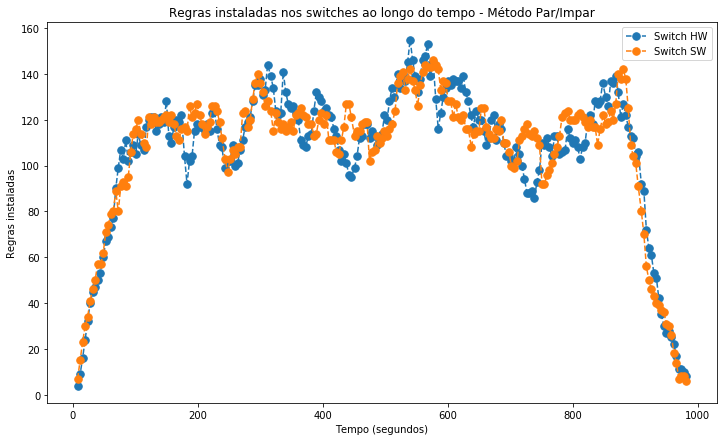

In [5]:
#Agrupando por switch
groups = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")

# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.RegrasInstaladas, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
if(tipoTeste == "parimpar"):
    plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Par/Impar") #u = unicode
else:
    plt.title(u"Regras instaladas nos switches ao longo do tempo - Método SW/HW")
ax.legend()
#plt.savefig('regrasInstaladas_Tempo_'+tipoTeste+'_teste'+numTeste+'.pdf')
plt.show()